# Examinando Fatores que Influenciam a Sobrevivência no Titanic

## Introdução

O naufrágio do RMS Titanic é um dos mais infames naufrágios da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou depois de colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes. Esta tragédia sensacional chocou a comunidade internacional e levou a melhores normas de segurança para os navios.

Uma das razões pelas quais o naufrágio causou tal perda de vida foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação. Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas tinham maior probabilidade de sobreviver do que outros, como mulheres, crianças e a classe alta.

Neste projeto, um conjunto de dados contendo detalhes sobre um subconjunto de passageiros que estavam a bordo do Titanic no entanto não temos informações sobre a origem dos dados disponibilizados. Os dados são a base de uma competição de machine learning do Kaggle, que não informa de onde retirou os dados.

Etapas da análise

A análise será realizada da seguinte forma:

Etapa 1: Limpeza dos dados
Etapa 2: Elaboração de perguntas a serem respondidas sobre os dados
      2.1. Proporcionalmente, havia mais homens ou mulheres que sobreviveram?
      2.2. Havia alguma relação entre a classe em que você estava viajando e as chances de sobrevivência da tragédia?
      2.3. Houve uma proporção masculina / feminina diferente nas diferentes classes? Isso afetou suas chances de sobrevivência?
      2.4. A idade do passageiro teve influência na sua taxa de sobrevivência?  E de que maneira idade e a classe do bilhete se            relaciona com as chances de sobrevivência.
      2.5. A quantidade de passageiros com esposas e/ou filhos indica uma taxa de sobrevivência mais alta?
      2.6. É possível ver alguma relação com a sobrevivência ao observar os diferentes locais de embarque?
Etapa 3: Conclusões
      3.1. Limitações, observações finais sobre a análise (limitações dos dados estudados e pontos-chaves encontrados) serão abordados na última etapa:

### Descrição das colunas

Detalhes sobre os campos do conjunto de dados são descritos a seguir:

urvived: Diz se o passageiro sobreviveu (0 = Não; 1 = Sim)
Pclass: Classe socio-econômica do passageiro (1 = Classe Alta; 2 = Classe Média; 3 = Classe Baixa)
Name: Nome do passageiro
Sex: Sexo do Passageiro
Age: Idade do passageiro
SibSp: Número de irmãos e cônjuges a bordo
Parch: Número de pais e filhos a bordo
Ticket: Número do ticket do passageiro
Fare: Tarifa paga pelo passageiro
Cabin: Número da cabine
Embarked: Porta de embarcação (C = Cherbourg; Q = Queenstown; S = Southampton)

In [4]:
# carregue os conjuntos de dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

titanic = pd.read_csv('titanic_data.csv')
# primeiras linhas
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,148,4
top,NaN,NaN,NaN,"Masselmani, Mrs. Fatima",male,NaN,NaN,NaN,1601,NaN,NA,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,687,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [44]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Se olharmos apenas para os passageiros, havia aproximadamente 1300 saindo com o navio e 812 mortos, deixando a taxa de sobrevivência de passageiros em um nível de 38%, o que é exatamente a mesma da nossa amostra - 38%. Assim, a expectativa é que a nossa amostra seja fiel ao total.

# 1. Limpeza dos dados

Antes de mergulhar nas questões, o conjunto de dados será analisado para identificar anomalias relacionadas à validade, exatidão ou integridade dos dados e, se possível, corrigir tais problemas.

In [114]:
# Revela quais colunas tem células vazias
titanic.isna().sum()[titanic.isna().sum() != 0]/titanic.shape[0] * 100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

Ao analisar os valores faltantes de coluna, a cabine é o que apresenta o maior indice com 77% das observações em falta.

In [ ]:
Para preencher as células vazias, substituimos todas pela idade média de todos os passageiros.

In [6]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [ ]:
Substituir as células vazias de Embarked por NA.

In [7]:
titanic['Embarked'].fillna(value='NA', inplace=True)

In [ ]:
Substituir as células vazias de Cabin por NA.

In [8]:
titanic['Cabin'].fillna(value='NA', inplace=True)

In [ ]:
Por fim conferir se todos os valores faltantes foram eliminados.

In [119]:
titanic.isna().sum()[titanc.isna().sum() != 0]/titanic.shape[0] * 100

Series([], dtype: float64)

Pronto agora a base de dados está completa. Por fim fazemos um pente fino para conferir a quantidade de valores únicos em Cabine e o quão benéfico será ter preenchido todas as células vazias desta coluna.

In [67]:
titanic['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

A contagem de células similares em Cabin revela que os existe uma pluralidade de valores únicos, e ainda sim 77% do volume das informações estavam vazias, neste caso ainda não é possível tirar alguma conclusão sobre a influência desta variável na taxa de sobrevivência.

In [8]:
# Renomeando o nome das colunas para dar maior clareza na hora da análise
titanic.rename(index=str, 
                  columns={"Pclass": "Bilhete", 
                           "SibSp": "Parente", 
                           "Parch": "Filhos"}, 
                  inplace=True)

In [9]:
# Verificando, novamente, o estado dos dados e as colunas disponíveis no dataset
titanic.head()

,PassengerId,Survived,Bilhete,Name,Sex,Age,Parente,Filhos,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# Verificando se há dados duplicados
sum(titanic.duplicated())

0

# 2. Inicio da análise

A intenção desta análise é entender qual ou quais os fatores ou combinações que contribuíram para a sobrevivência da tragédia. A partir algumas perguntas que podem fornecer alguns são indicios são:

1.1 - Proporcionalmente, havia mais homens ou mulheres que sobreviveram?
1.2 - Havia alguma relação entre a classe em que você estava viajando e as chances de sobrevivência da tragédia?
1.3 - Houve uma proporção masculina / feminina diferente nas diferentes classes? Isso afetou suas chances de sobrevivência?
1.4 - A idade do passageiro teve influência na sua taxa de sobrevivência?
1.5 - A quantidade de passageiros com esposas e/ou filhos indica uma taxa de sobrevivência mais alta?
1.6 - É possível ver alguma relação com a sobrevivência ao observar os diferentes locais de embarque?

O projeto se concentrará em responder a todas essas perguntas, mas sempre através das lentes dos fatores que contribuíram para a sobrevivência da tragédia.

## 2.1. Proporcionalmente, havia mais homens ou mulheres que sobreviveram?

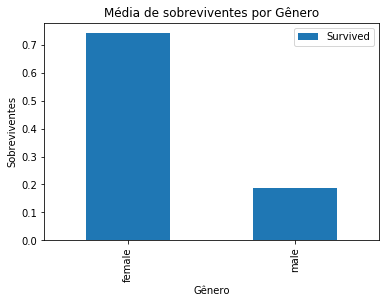

In [42]:
titanic[['Survived']].groupby(titanic['Sex']).mean().plot.bar()
plt.title('Média de sobreviventes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Sobreviventes')
plt.show()

Ao observamos o gráfico é visível que a chance das mulheres sobreviverem foi muito superior ao gênero masculino.

## 2.2. Havia alguma relação entre a classe em que você estava viajando e as chances de sobrevivência da tragédia?

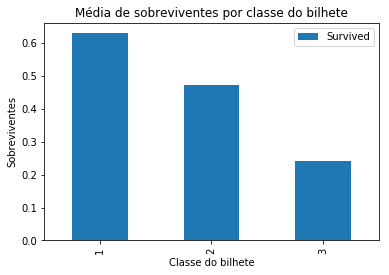

In [13]:
titanic[['Survived']].groupby(titanic['Bilhete']).mean().plot.bar()
plt.title('Média de sobreviventes por classe do bilhete')
plt.xlabel('Classe do bilhete')
plt.ylabel('Sobreviventes')
plt.show()

A classe do bilhete, indicando uma condição de classe econômica mas privilegiada e por fim quanto maior a classe, mais próximas as cabines estavam do barco salva-vidas. Sem dúvida um fator importante na sobrevivência, já que podemos observar no gráfico que os que estavam na primeira classe tiveram mais chance de sobreviver.

## 2.3. Houve uma proporção masculina / feminina diferente nas diferentes classes? Isso afetou suas chances de sobrevivência?


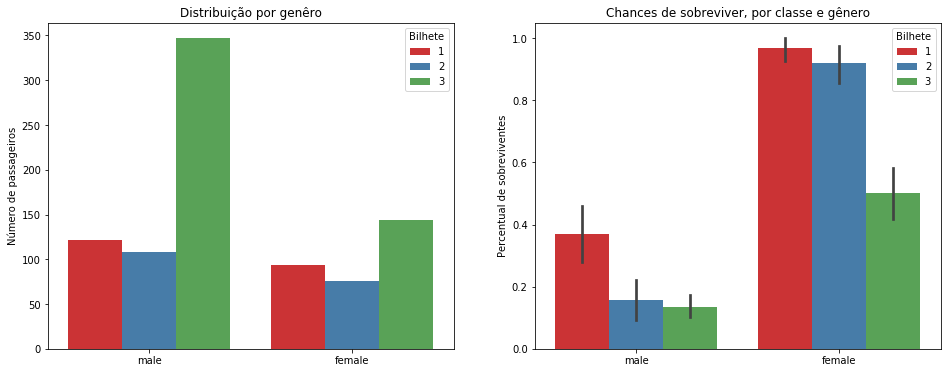

In [11]:
#Avaliar por classe a quantidade de cada gênero e as respectivas chances de sobreviver a tragédia
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

sns.countplot(x="Sex", hue="Bilhete", palette="Set1", data=titanic, ax=ax1)
ax1.set_title("Distribuição por genêro")
ax1.set_xlabel("")
ax1.set_ylabel("Número de passageiros")

sns.barplot(x="Sex", y="Survived", hue="Bilhete", palette="Set1", data=titanic, ax=ax2)
ax2.set_title("Chances de sobreviver, por classe e gênero")
ax2.set_xlabel("")
ax2.set_ylabel("Percentual de sobreviventes")

plt.show()

Não apenas ser uma mulher afetou suas chances de sobrevivência, mas, acima de tudo, como uma mulher que você estava viajando na 1ª ou na 2ª classe, você estava quase garantido. Mas ser um homem tornou as coisas ainda piores: apesar das chances de sobrevivência por estarem na 1ª classe eram mais do que o dobro do que as da 2ª e 3ª, eles ainda eram mais menores do que as mulheres na 3ª classe.

## 2.4. A idade do passageiro teve influência na sua taxa de sobrevivência? E de que maneira idade e a classe do bilhete se relaciona com as chances de sobrevivência.

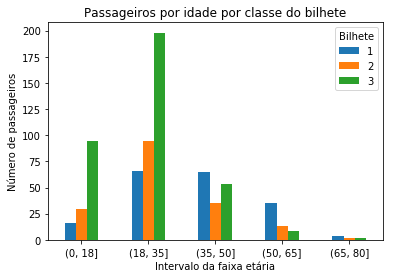

In [62]:
# Agrupa os passageiros em intervalos de idade

bins = [0, 18, 35, 50, 65, 80]
passengers_by_age = titanic.groupby(['Bilhete', pd.cut(titanic.Age, bins)])
age_by_pclass = passengers_by_age.size().unstack()

age_by_pclass1 = age_by_pclass.iloc[0]
age_by_pclass2 = age_by_pclass.iloc[1]
age_by_pclass3 = age_by_pclass.iloc[2]

# Em seguida, exibe a função incorporada ao gráfico com
# o total de passageiros em cada classe, por faixa etária.

age_by_pclass_t = age_by_pclass.transpose()
ax = age_by_pclass_t.plot.bar(title="Passageiros por idade por classe do bilhete", xticks=[])
ax.set_xlabel("Intervalo da faixa etária")
ax.set_ylabel("Número de passageiros")

plt.show()

Antes de mergulhar nos sobreviventes, este enredo dá uma melhor sensibilidade de como as pessoas distribuem de acordo com a idade. É um bom indicador de que o aumento da idade se correlaciona com padrões mais elevados quando se trata de viajar (ou seja, 1ª e 2ª classe).

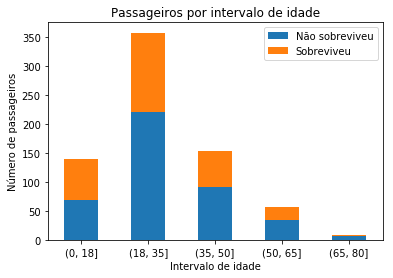

Survived    0    1
Age               
(0, 18]    69   70
(18, 35]  221  137
(35, 50]   92   61
(50, 65]   35   21
(65, 80]    7    1


In [66]:
# Agrupa os passageiros em invtervalos de idade, delimitados por caixas pré-selecionadas.


bins = [0, 18, 35, 50, 65, 80]
passengers_by_age = titanic.groupby(['Survived', pd.cut(titanic.Age, bins)])
survived_by_age = passengers_by_age.size().unstack()

#Em seguida, exibe o gráfico empilhado
# com os sobrevientes e mortos, segmentados por faixa etária .

survived_by_age_t = survived_by_age.transpose()
ax = survived_by_age_t.plot.bar(stacked=True, title="Passageiros por intervalo de idade", xticks=[])
ax.set_xlabel("Intervalo de idade")
ax.set_ylabel("Número de passageiros")
ax.legend(['Não sobreviveu', 'Sobreviveu'])

plt.show()
print (survived_by_age_t)

Este gráfico relaciona algumas tendências observadas nos gráfico anterior.

Por um lado, os idosos tendem a viajar em melhores classes à medida que sua idade aumenta. Portanto, uma pequena porcentagem de passageiros entre 18 e 35 anos viajou na 1ª classe, mas a maioria dos passageiros acima de 50 viajou na 1ª e 2ª classe.

Mas antes disso, vimos que as mulheres que viajavam na 1ª e na 2ª classe tinham quase o dobro de chances de sobreviver, comparadas com as que viajavam na 3ª classe.

Mas aqui vem a parte interessante: independentemente de você ser homem ou mulher, as chances de sobrevivência permaneceram as mesmas (em torno de 40%) em diferentes faixas etárias. Apenas aumentando para as crianças e diminuindo drasticamente para os mais velhos.

Portanto, apesar da maior parte de pessoas (entre 18 e 35 anos) estarem viajando principalmente na 3ª classe, elas estavam entre as que obtiveram o maior número de sobreviventes. Nesse sentido, também crianças (18 anos ou menos), que a maioria viajava na 3ª classe, obtiveram a maior taxa de sobrevivência, acima de 50%.

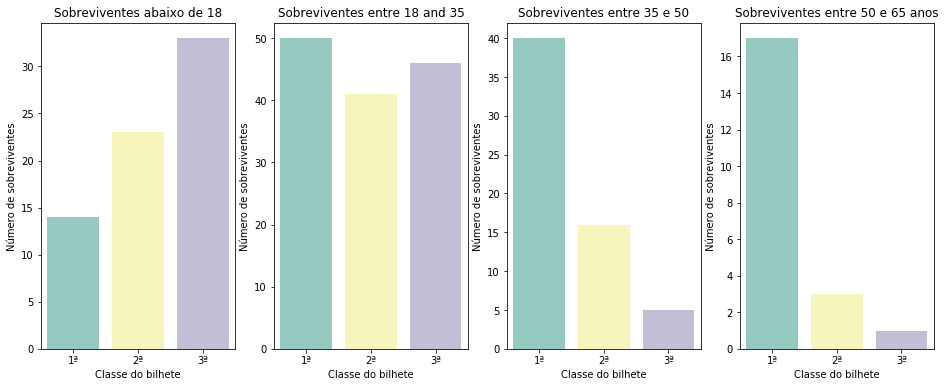

In [59]:
# Dados de Bilhetes filtrados com base na idade, reagrupados em arrays dentro de um novo DF.

range_18 = []
range_18_35 = []
range_35_50 = []
range_50_65 = []
range_65 = []

for index, row in titanic.iterrows():
    if (row['Age'] <= 18) & (row['Survived'] == 1):
        range_18.append(row["Bilhete"])
    elif (18 < row['Age'] <= 35) & (row['Survived'] == 1):
        range_18_35.append(row["Bilhete"])
    elif (35 < row['Age'] <= 50) & (row['Survived'] == 1):
        range_35_50.append(row["Bilhete"])
    elif (50 < row['Age'] <= 65) & (row['Survived'] == 1):
        range_50_65.append(row["Bilhete"])
    elif (row['Age'] >= 65) & (row['Survived'] == 1):
        range_65.append(row["Bilhete"])

age_df = pd.DataFrame(
    data=[range_18,
          range_18_35,
          range_35_50,
          range_50_65,
          range_65],
    index=['under18', '18to35', '35to50', '50to65', 'over65'])

# Em seguida, exibe os sobreviventes por Classe do bilhete para cada grupo de faixa etária.

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 6), sharex=False)

sns.countplot(x="under18", palette="Set3", data=age_df.transpose(), ax=ax1)
ax1.set_title("Sobreviventes abaixo de 18")
ax1.set_xlabel("Classe do bilhete")
ax1.set_ylabel("Número de sobreviventes")
ax1.set(xticklabels=["1ª","2ª","3ª"])

sns.countplot(x="18to35", palette="Set3", data=age_df.transpose(), ax=ax2)
ax2.set_title("Sobreviventes entre 18 and 35")
ax2.set_xlabel("Classe do bilhete")
ax2.set_ylabel("Número de sobreviventes")
ax2.set(xticklabels=["1ª","2ª","3ª"])

sns.countplot(x="35to50", palette="Set3", data=age_df.transpose(), ax=ax3)
ax3.set_title("Sobreviventes entre 35 e 50")
ax3.set_xlabel("Classe do bilhete")
ax3.set_ylabel("Número de sobreviventes")
ax3.set(xticklabels=["1ª","2ª","3ª"])

sns.countplot(x="50to65", palette="Set3", data=age_df.transpose(), ax=ax4)
ax4.set_title("Sobreviventes entre 50 e 65 anos")
ax4.set_xlabel("Classe do bilhete")
ax4.set_ylabel("Número de sobreviventes")
ax4.set(xticklabels=["1ª","2ª","3ª"])

plt.show()

O gráfico acima prova que o intervalo de idade (35 a 50) e (50 a 65), quase todos os sobreviventes vieram da 1a e 2a classe, e realmente poucas pessoas dessa faixa etária (apenas 6 de 209) sobreviveram na terceira classe.

Em seguida, o grande volume de sobreviventes vem de 18 a 50, viajando na 1ª e 2ª classe. Portanto, podemos supor, como já vimos na pergunta 2.2, que os passageiros da 1ª e da 2ª classe tiveram uma melhor chance de sobrevivência em comparação com os da 3ª classe.

Finalmente, apesar de não mostrar no gráfico acima, dos 8 passageiros abordo com mais de 65 anos, apenas um sobreviveu, sendo ele um passageiro de primeira classe. Ainda que os passageiros com mais de 65 anos foram os que possiam menores chances de sobrevivência.

## 2.5. A quantidade de passageiros com esposas e/ou filhos indica uma taxa de sobrevivência mais alta?

In [14]:
# Conta valores únicos de parentes por passageiros
titanic['Parente'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: Parente, dtype: int64

Definitivamente a maioria dos passageiros não tinham parentes no navio.

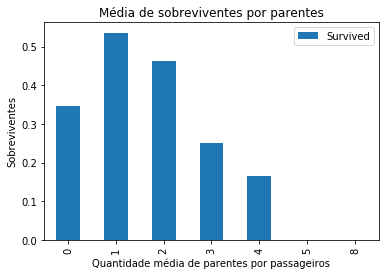

In [15]:
titanic[['Survived']].groupby([titanic['Parente']]).mean().plot.bar()
plt.title('Média de sobreviventes por parentes')
plt.xlabel('Quantidade média de parentes por passageiros')
plt.ylabel('Sobreviventes')
plt.show()

É possível ver que aqueles que tinham ao menos 1 parente no navio tinham mais chance de sobreviver.

In [16]:
# Conta valores únicos de filhos por passageiros
titanic['Filhos'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Filhos, dtype: int64

Definitivamente a maioria não tinha filhos, e como vimos anteriormente ser criança era um fator que aumentava a chances de sobrevivência.

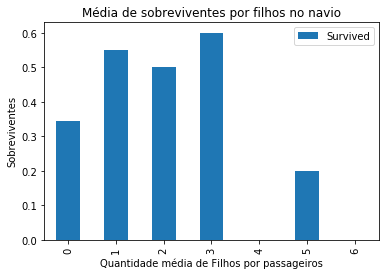

In [17]:
titanic[['Survived']].groupby([titanic['Filhos']]).mean().plot.bar()
plt.title('Média de sobreviventes por filhos no navio')
plt.xlabel('Quantidade média de Filhos por passageiros')
plt.ylabel('Sobreviventes')
plt.show()

É difícil ver padrão no gráfico acima. Dado o fato de que ambos se relacionam com o número de membros da família, podemos ver ambos combinados.

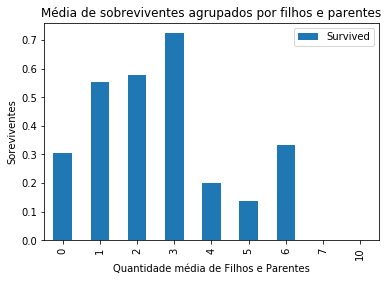

In [68]:
#Média de sobreviventes segmentado pelo agrupamento de Filhos e Parentes
titanic[['Survived']].groupby([titanic['Filhos'] + titanic['Parente']]).mean().plot.bar()
plt.title('Média de sobreviventes agrupados por filhos e parentes')
plt.xlabel('Quantidade média de Filhos e Parentes')
plt.ylabel('Soreviventes')
plt.show()

Parece que a maioria dos passageiros não tinha membros da família a bordo, quanto aqueles que tinham sobreviveram com maior frequência.

## 2.6. É possível ver alguma relação com a sobrevivência ao observar os diferentes locais de embarque?

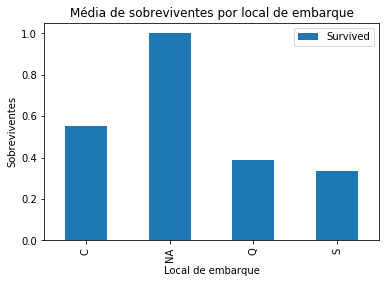

In [29]:
# Composição do gráfico em barras dos sobreviventes por local de embarque
titanic[['Survived']].groupby([titanic['Embarked']]).mean().plot.bar()
plt.title('Média de sobreviventes por local de embarque')
plt.xlabel('Local de embarque')
plt.ylabel('Sobreviventes')
plt.show()

É possível observar que os pessoas que embarcaram em Cherbourg tiveram maiores chances de sobreviver, no entanto não há qualquer explicação para o fato.

# 3.Conclusão

Depois de estudar o conjunto de dados em profundidade, podemos concluir com segurança que haviam vários fatores que contribuíram para a sobrevivência da tragédia. Entretanto, algumas circunstâncias pareciam desempenhar um papel chave nas chances de sobreviver.

Para começar, havia 891 passageiros, dos quais:

Não sobreviveu: 549 (61,62%)
Sobrevivido: 342 (38,38%)

Dos 342 que sobreviveram:
68,13% eram mulheres
31,87% eram homens

O que não só nos diz que as mulheres tinham uma chance maior de sobrevivência, mas ainda mais, se colocássemos esses números em uma perspectiva mais global:

Havia 314 mulheres(35,24% do total de passageiros)

Sobreviveu: 233 (74,21%)
Não sobreviveu: 81 (25,79%)

Havia 577 homens (64,75% do total de passageiros)
Sobreviveu: 109 (18,89%)
Não sobreviveu: 468 (81,11%)

Portanto, não é só que mais mulheres sobrevivem em números absolutos, mas, em termos percentuais, a diferença é enorme.

Mas as coisas ficam ainda mais interessantes quando começamos a investigar as preferências de viagem. Aqui está o colapso das chances de sobrevivência de homens e mulheres segmentados pela classe em que estavam viajando.

Mulheres
1º 96,80%
2 92,10%
3º 50,00%

Homens
1º 36,88%
2º 15,74%
3 13,54%

Se ser mulher era importante, ser uma mulher rica quase lhe garantiu a saída da tragédia. Portanto, não só gênero desempenhou um papel enorme quando se tratou da sobrevivência mas a classe do bilhete adquirido.

Quando quebramos o conjunto de dados por idade, isso revelou duas coisas:
Primeiro, a maioria dos passageiros pertencia ao grupo de 18 a 35 anos
Segundo, era mais provável que os passageiros com mais de 35 anos ocupassem as cadeiras de 1ª e 2ª classe.

Logicamente, o que deriva da primeira inferência é que, apesar da maior parte de pessoas (18 a 35 anos) estarem viajando na 3ª classe, elas estavam entre as que obtiveram o maior número de sobreviventes em números absolutos.

Finalmente, a divisão por idade e classe do bilhete, revelou que entre as faixas etárias (35-50) e (50-65), quase todos os sobreviventes vieram da 1ª e 2ª classe, e realmente poucas pessoas dessa faixa etária (apenas 6 de 209 ), tiveram exito a partir da 3ª classe.

Por fim há alguns pontos a serem discutidos a seguir sobre a limitação do próprio conjunto de dados.

## 3.1.Limitações

Em primeiro lugar, o número de passageiros no momento do acidente varia entre 3.327 a 3.547, dependendo das fontes. Portanto, temos dados limitados em mãos e tirar conclusões de um conjunto pequeno pode apontar para causas enganosas.

Além disso, nós não temos registros de idade de uma grande parte do conjunto de dados, cuja maioria foi inferida pela média da idade. Apesar de ser um bom indicador, não é tão confiável quanto ter os dados completos e pode ser propenso a erros em nossas conclusões.

Alguns dados adicionais também poderiam ter sido úteis para o estudo. Por exemplo, a distância entre a cabine e os barcos salva-vidas é definitivamente um ótimo elo que não conseguimos explorar. Alem do fato de que quase todos os dados de cabine estão faltando (apenas 204 valores não nulos de 891). Relacionado a isso, o deck onde a cabine estava localizada poderia ter sido um uma informação valiosoa que poderíamos ter usado descobrir o quanto a altura influenciava na taxa de sobrevivência.